In [1]:
import pandas as pd

In [2]:
# read the sentiment results of the nonecig group
data1 = pd.read_csv('sentiment_result_nonecig_users_US_2019.csv')
data1.shape

(11479773, 4)

In [3]:
data1.head()

posts  sentiment_score  \
0  Sen. @tedcruz UNLOADS on Dems from the Senate ...          -0.6808   
1  One day I'm gonna ask someone to fully explain...          -0.0516   
2  Wow...\r\n\r\nNevada governor bans malaria dru...          -0.4215   
3  Wow...\r\n\r\nHawaii Lt. Gov. Josh Green Banne...          -0.7650   
4  In a nutshell:\r\n\r\nThe MSM and Dems want ch...          -0.3182   

     user_id                 datetime  
0  924685884  2020-03-23 21:34:55.373  
1  924685884  2020-03-25 00:46:33.708  
2  924685884  2020-03-25 01:49:10.786  
3  924685884  2020-03-25 02:30:23.802  
4  924685884  2020-03-25 03:31:26.919

In [4]:
pd.to_datetime(data1['datetime'], format='%Y/%m/%d')

0          2020-03-23 21:34:55.373
1          2020-03-25 00:46:33.708
2          2020-03-25 01:49:10.786
3          2020-03-25 02:30:23.802
4          2020-03-25 03:31:26.919
                     ...          
11479768   2020-03-14 16:52:23.647
11479769   2020-03-14 16:54:01.861
11479770   2020-03-14 16:54:49.637
11479771   2020-03-14 16:55:04.829
11479772   2020-03-14 16:55:57.896
Name: datetime, Length: 11479773, dtype: datetime64[ns]

In [5]:
data1['date'] = pd.to_datetime(data1['datetime']).dt.strftime('%Y-%m-%d')

In [6]:
data1.head()

posts  sentiment_score  \
0  Sen. @tedcruz UNLOADS on Dems from the Senate ...          -0.6808   
1  One day I'm gonna ask someone to fully explain...          -0.0516   
2  Wow...\r\n\r\nNevada governor bans malaria dru...          -0.4215   
3  Wow...\r\n\r\nHawaii Lt. Gov. Josh Green Banne...          -0.7650   
4  In a nutshell:\r\n\r\nThe MSM and Dems want ch...          -0.3182   

     user_id                 datetime        date  
0  924685884  2020-03-23 21:34:55.373  2020-03-23  
1  924685884  2020-03-25 00:46:33.708  2020-03-25  
2  924685884  2020-03-25 01:49:10.786  2020-03-25  
3  924685884  2020-03-25 02:30:23.802  2020-03-25  
4  924685884  2020-03-25 03:31:26.919  2020-03-25

In [7]:
# save tweets from the nonecig group for topic modeling
text1 = data1[['posts']] 
text1.to_csv('corona_nonecig_users_US_tweets_2019.csv')

In [8]:
# read the sentiment results of the ecig group
data2 = pd.read_csv('sentiment_result_ecig_users_US_2019.csv')
data2.shape

(4500248, 4)

In [9]:
data2.head()

posts  sentiment_score  \
0  I'm HORRIFIED by this #whitehousePressconferen...          -0.3485   
1  Later he found out that Rand Paul had coronavirus           0.0000   
2  I swear we are fighting two pandemics \r\nCovi...          -0.6808   
3  BREAKING: A Texas judge appointed by George W....          -0.5106   
4  We had the ability to house the homeless befor...           0.4291   

              user_id                 datetime  
0  996934378059165698  2020-03-23 23:52:17.714  
1  996934378059165698  2020-03-24 01:22:27.751  
2            41247057  2020-03-28 08:39:10.923  
3            14882476  2020-03-30 22:46:24.772  
4          2290220899  2020-03-24 08:44:24.875

In [10]:
pd.to_datetime(data2['datetime'], format='%Y/%m/%d')

0         2020-03-23 23:52:17.714
1         2020-03-24 01:22:27.751
2         2020-03-28 08:39:10.923
3         2020-03-30 22:46:24.772
4         2020-03-24 08:44:24.875
                    ...          
4500243   2020-03-21 00:55:58.763
4500244   2020-03-21 00:57:32.858
4500245   2020-03-22 14:12:54.653
4500246   2020-03-22 15:22:53.794
4500247   2020-03-20 06:31:56.702
Name: datetime, Length: 4500248, dtype: datetime64[ns]

In [11]:
data2['date'] = pd.to_datetime(data2['datetime']).dt.strftime('%Y-%m-%d')

In [12]:
data2.head()

posts  sentiment_score  \
0  I'm HORRIFIED by this #whitehousePressconferen...          -0.3485   
1  Later he found out that Rand Paul had coronavirus           0.0000   
2  I swear we are fighting two pandemics \r\nCovi...          -0.6808   
3  BREAKING: A Texas judge appointed by George W....          -0.5106   
4  We had the ability to house the homeless befor...           0.4291   

              user_id                 datetime        date  
0  996934378059165698  2020-03-23 23:52:17.714  2020-03-23  
1  996934378059165698  2020-03-24 01:22:27.751  2020-03-24  
2            41247057  2020-03-28 08:39:10.923  2020-03-28  
3            14882476  2020-03-30 22:46:24.772  2020-03-30  
4          2290220899  2020-03-24 08:44:24.875  2020-03-24

In [13]:
# save tweets from the ecig group for topic modeling
text2 = data2[['posts']]
text2.to_csv('corona_ecig_users_US_tweets_2019.csv')

In [14]:
# calculate the average sentiment score of each ecig user on each day
df2 = data2.groupby(['user_id', 'date']).agg({'sentiment_score': ['mean']})
df2.columns = ['sentiment_mean']
df2 = df2.reset_index()
df2.head()

user_id        date  sentiment_mean
0      224  2020-03-05         -0.6649
1      224  2020-03-06         -0.4686
2      224  2020-03-07          0.0258
3      224  2020-03-08         -0.7351
4      224  2020-03-09         -0.7906

In [15]:
# calculate the average sentiment score of each nonecig user on each day
df1 = data1.groupby(['user_id', 'date']).agg({'sentiment_score': ['mean']})
df1.columns = ['sentiment_mean']
df1 = df1.reset_index()
df1.head()

user_id        date  sentiment_mean
0       13  2020-03-16          0.6249
1       13  2020-03-17         -0.3818
2       13  2020-03-30          0.3182
3       13  2020-04-02          0.0000
4       16  2020-03-21          0.8689

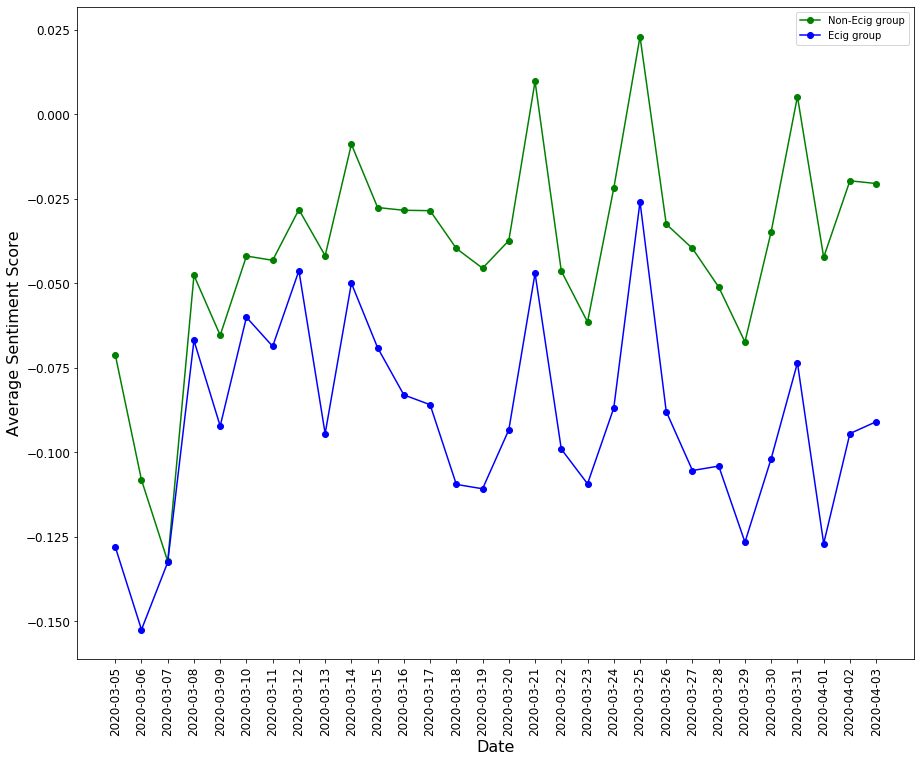

In [16]:
# plot the sentiment scores of the ecig and nonecig groups
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(15,12))
s1 = df1.groupby(df1['date'])['sentiment_mean'].mean()
s2 = df2.groupby(df2['date'])['sentiment_mean'].mean()
_ = s1.plot(rot=90,color='g', marker = 'o', label='Non-Ecig group',fontsize=12)
_ = _.set_xticks(range(len(s1)))
_ = s2.plot(rot=90,color='b',marker='o',label='Ecig group',fontsize=12)

ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Average Sentiment Score',fontsize=16)

ax.legend()
plt.show()